In [144]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
path1 = './kmeans_data/Dataset1.csv'
path2 = './kmeans_data/Dataset2.csv'

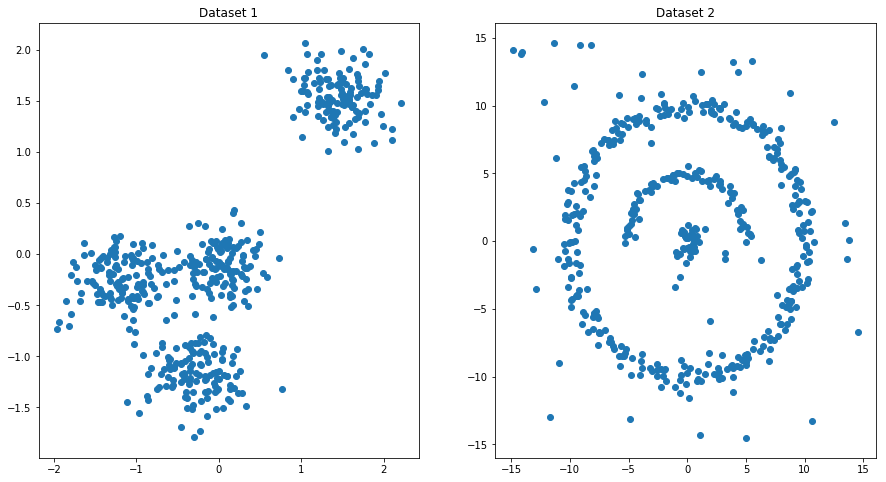

In [146]:
dataset1 = pd.read_csv(path1)
dataset2 = pd.read_csv(path2)
dataset1 = dataset1.values
dataset2 = dataset2.values

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 8)
axes[0].scatter(dataset1[:, 0], dataset1[:, 1])
axes[1].scatter(dataset2[:, 0], dataset2[:, 1])
axes[0].title.set_text('Dataset 1')
axes[1].title.set_text('Dataset 2')

In [151]:
def kmeans_clustering(data, k, iters):
    centroids_idx = np.random.randint(0, data.shape[0]-1, k)
    centroids = data[centroids_idx, :]
    for i in range(iters):
        distances = (data ** 2).sum(axis=1).reshape(-1, 1) + (centroids ** 2).sum(axis=1).reshape(1, -1) - 2 * (data @ centroids.T)
        clusters = distances.argmin(axis=1)
        for i in range(k):
            centroids[i] = data[clusters == i, :].mean(axis=0)
    return centroids, clusters

In [152]:
def run_kmeans(ks, dataset, iters, talk=True):
    if talk:
        fig, axes = plt.subplots(1, len(ks))
        fig.set_size_inches(len(ks) * 7, 7)

    clustering_errors = []
    for i, k in enumerate(ks):
        centroids, clusters = kmeans_clustering(dataset, k, iters)
        if talk:
            for j in range(k):
                cluster = dataset[clusters == j, :]
                axes[i].scatter(cluster[:, 0], cluster[:, 1])
                axes[i].title.set_text('k = {}'.format(k))
            
        distances = (dataset ** 2).sum(axis=1).reshape(-1, 1) + (centroids ** 2).sum(axis=1).reshape(1, -1) - 2 * (dataset @ centroids.T)
        distances = distances ** 0.5
        clusters = distances.argmin(axis=1)
        errors = []
        for j in range(k):
            errors.append(distances[clusters == j].min(axis=1).mean())
        if talk:
            print('k = {}'.format(k))
            for j in range(k):
                print('  Cluster {} Error = {}'.format(j, errors[j]))
            print('  Clustering Error = {}'.format(sum(errors) / len(errors)))
            print()
        
        clustering_errors.append(sum(errors) / len(errors))
    return clustering_errors

k = 2
  Cluster 0 Error = 0.7491160326963785
  Cluster 1 Error = 0.31600881957734717
  Clustering Error = 0.5325624261368629

k = 3
  Cluster 0 Error = 0.3398702316491397
  Cluster 1 Error = 0.6163639287851188
  Cluster 2 Error = 0.31600881957734717
  Clustering Error = 0.4240809933372019

k = 4
  Cluster 0 Error = 0.2886597397595568
  Cluster 1 Error = 0.31600881957734717
  Cluster 2 Error = 0.32383689405410077
  Cluster 3 Error = 0.3361233209400452
  Clustering Error = 0.31615719358276245



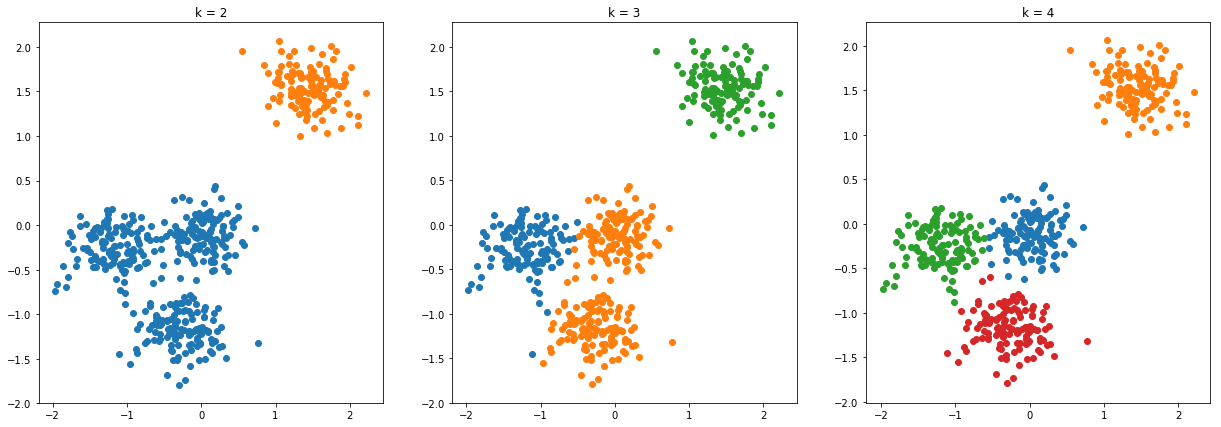

In [148]:
errors = run_kmeans([2, 3, 4], dataset1, 1000)

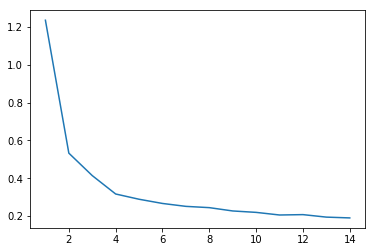

In [149]:
errors = run_kmeans(list(range(1, 15)), dataset1, 1000, talk=False)
plt.plot(list(range(1, 15)), errors)

k = 2
  Cluster 0 Error = 7.396107300630446
  Cluster 1 Error = 6.380886150249206
  Clustering Error = 6.8884967254398255

k = 3
  Cluster 0 Error = 5.410999961559884
  Cluster 1 Error = 5.205690839950511
  Cluster 2 Error = 5.929832916146065
  Clustering Error = 5.515507905885486

k = 4
  Cluster 0 Error = 4.521296452493892
  Cluster 1 Error = 5.164132384801465
  Cluster 2 Error = 4.740893143628751
  Cluster 3 Error = 4.085229575021368
  Clustering Error = 4.627887888986369

k = 5
  Cluster 0 Error = 3.3746731233969953
  Cluster 1 Error = 4.636629874910462
  Cluster 2 Error = 4.271250886205967
  Cluster 3 Error = 3.240150459664107
  Cluster 4 Error = 3.4713034466793524
  Clustering Error = 3.7988015581713768



[6.8884967254398255, 5.515507905885486, 4.627887888986369, 3.7988015581713768]

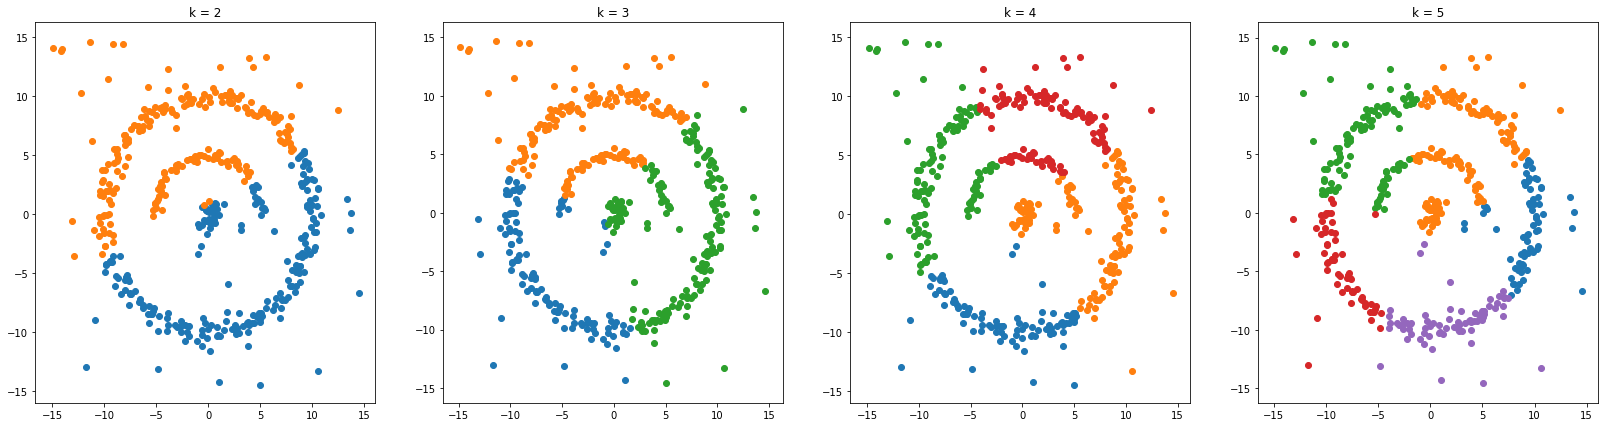

In [153]:
run_kmeans([2, 3, 4, 5], dataset2, 1000)